<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


#### Install the required libraries and import them


In [4]:
!pip install pandas

In [5]:
!pip install matplotlib

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [10]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [13]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [15]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [18]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [58]:
# Load actual data from the table into a real DataFrame
df = pd.read_sql_query("SELECT * FROM main", conn)

# Now df is a proper pandas DataFrame with rows and columns
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


In [64]:
df['CompTotal']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
65432   NaN
65433   NaN
65434   NaN
65435   NaN
65436   NaN
Name: CompTotal, Length: 65437, dtype: float64

## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [66]:
# Remove Outliers and Create a New DataFrame
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
No_outliers = df[(df['CompTotal'] > lower_bound) | (df['CompTotal'] < upper_bound)]
print(f"No Outliers: {len(No_outliers)}")
No_outliers['CompTotal']

No Outliers: 33740


72       2040000.0
374        28000.0
379        85000.0
385        50000.0
389       110000.0
           ...    
65396      36000.0
65401      40000.0
65408      61000.0
65412      58000.0
65431      55000.0
Name: CompTotal, Length: 33740, dtype: float64

C:\Users\serge\AppData\Local\Temp\ipykernel_8876\414731721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_outliers['CompTotal_log'] = No_outliers['CompTotal'].apply(lambda x: np.log10(x) if x > 0 else np.nan)


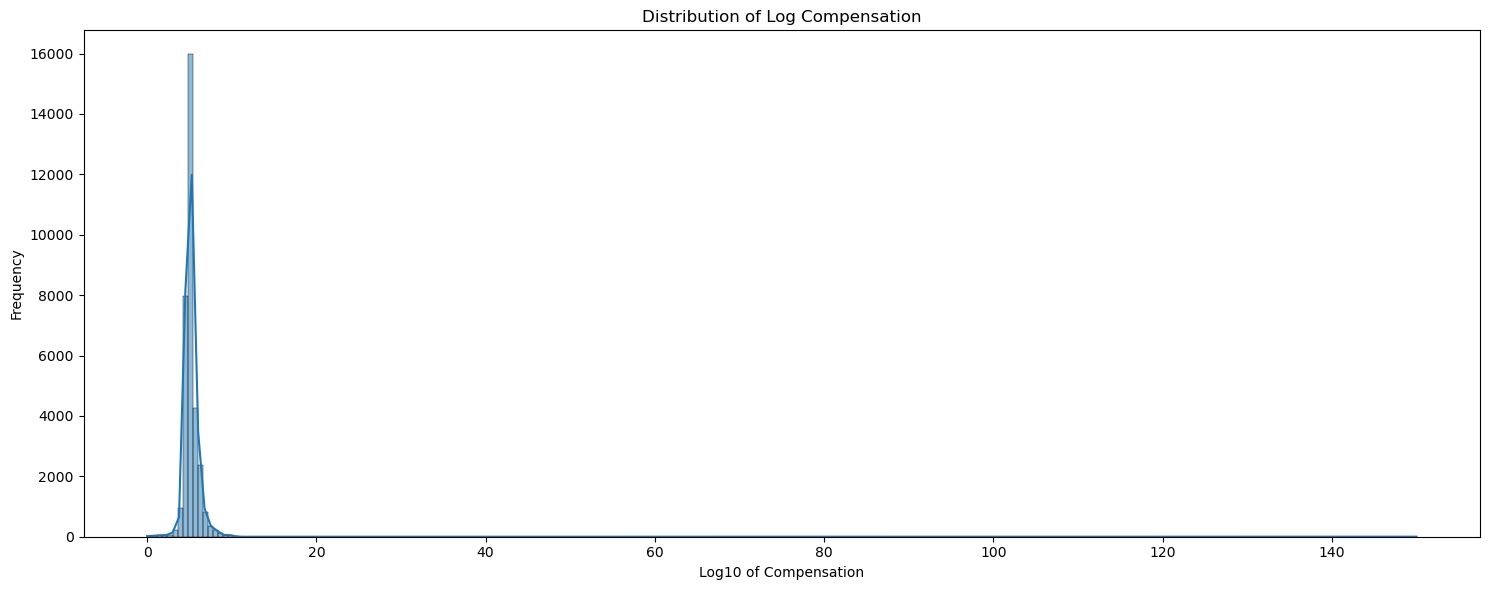

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Optional: log-transform to reduce skewness
No_outliers['CompTotal_log'] = No_outliers['CompTotal'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

# Use a histogram to see where the values are clustered:

plt.figure(figsize=(15, 6))
sns.histplot(No_outliers['CompTotal_log'].dropna(), bins=250, kde=True)
plt.title("Distribution of Log Compensation")
plt.xlabel("Log10 of Compensation")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

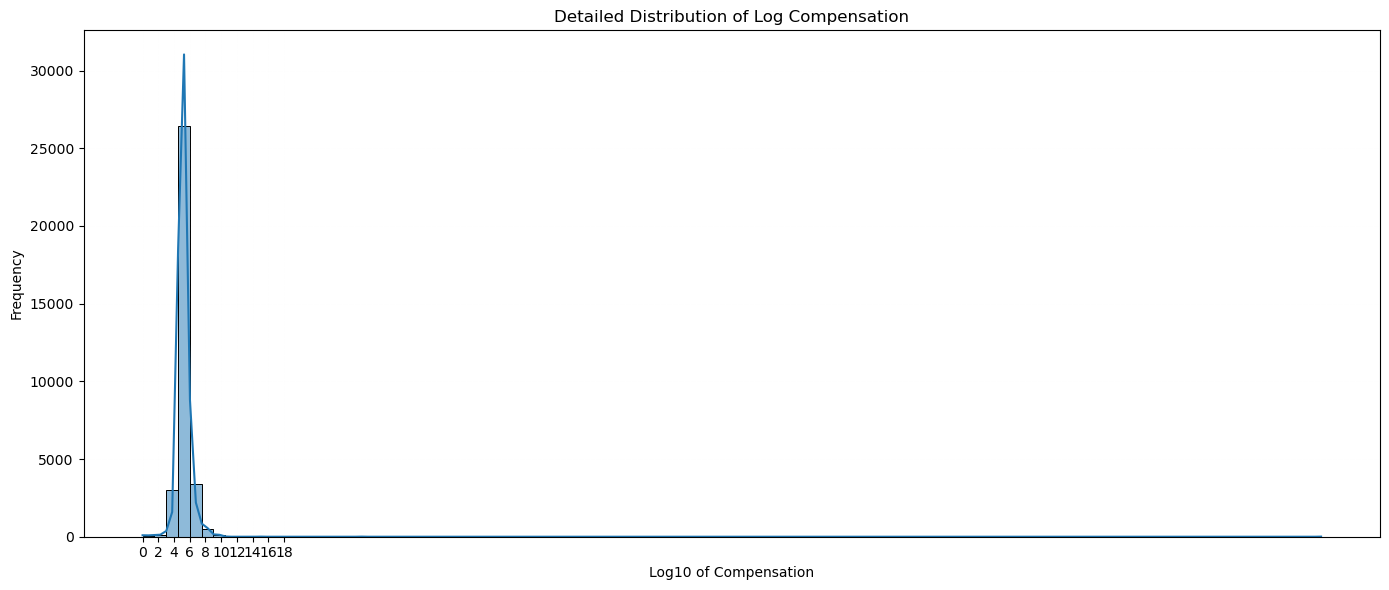

In [106]:
plt.figure(figsize=(14, 6))  # Extra wide for detail
sns.histplot(
    No_outliers['CompTotal_log'].dropna(), 
    bins=100,             # More bins = finer detail
    kde=True, 
    kde_kws={'bw_adjust': 0.5}  # Optional: sharper KDE line
)
plt.title("Detailed Distribution of Log Compensation")
plt.xlabel("Log10 of Compensation")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.01)
plt.xticks(np.arange(0, 20, 2))
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


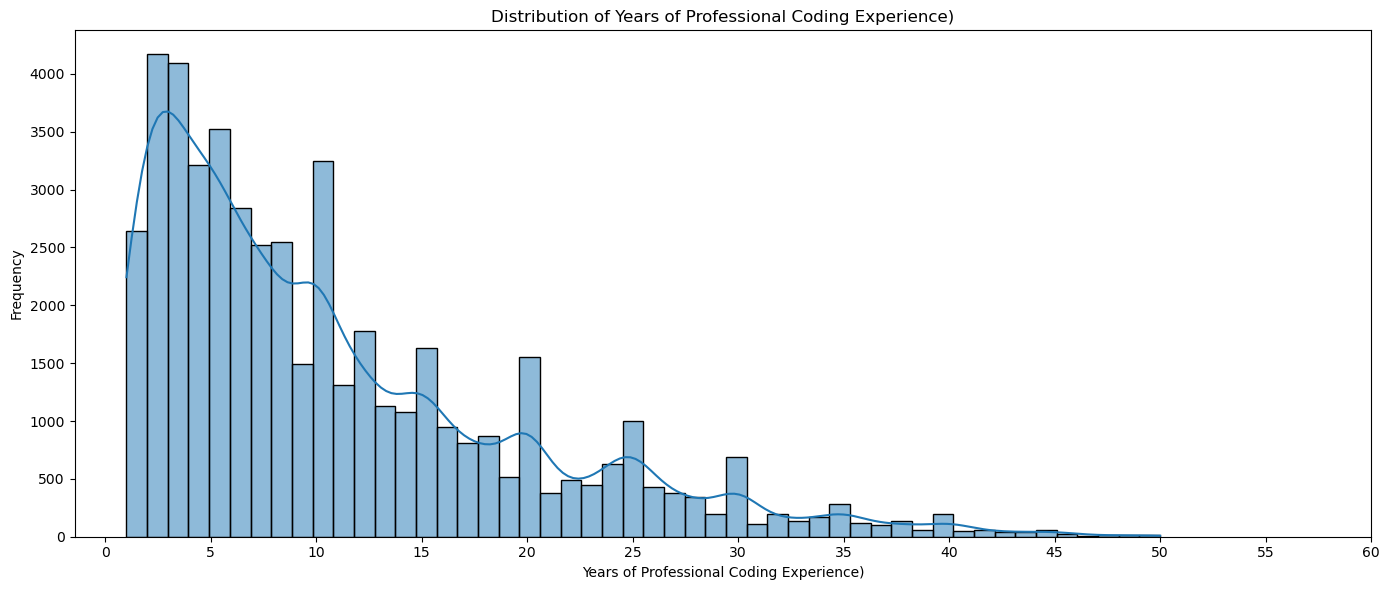

In [96]:
## Write your code here
## Write your code here

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Optional: log-transform to reduce skewness
# df['CompTotal_log'] = df['ConvertedCompYearly'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

# Use a histogram to see where the values are clustered:

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop NaNs
df_cleaned = df['YearsCodePro'].dropna()

# Sort the values
df_sorted = df_cleaned.sort_values()

plt.figure(figsize=(14, 6))
sns.histplot(df_sorted, bins=50, kde=True)
plt.title("Distribution of Years of Professional Coding Experience)")
plt.xlabel("Years of Professional Coding Experience)")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 65, 5))
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


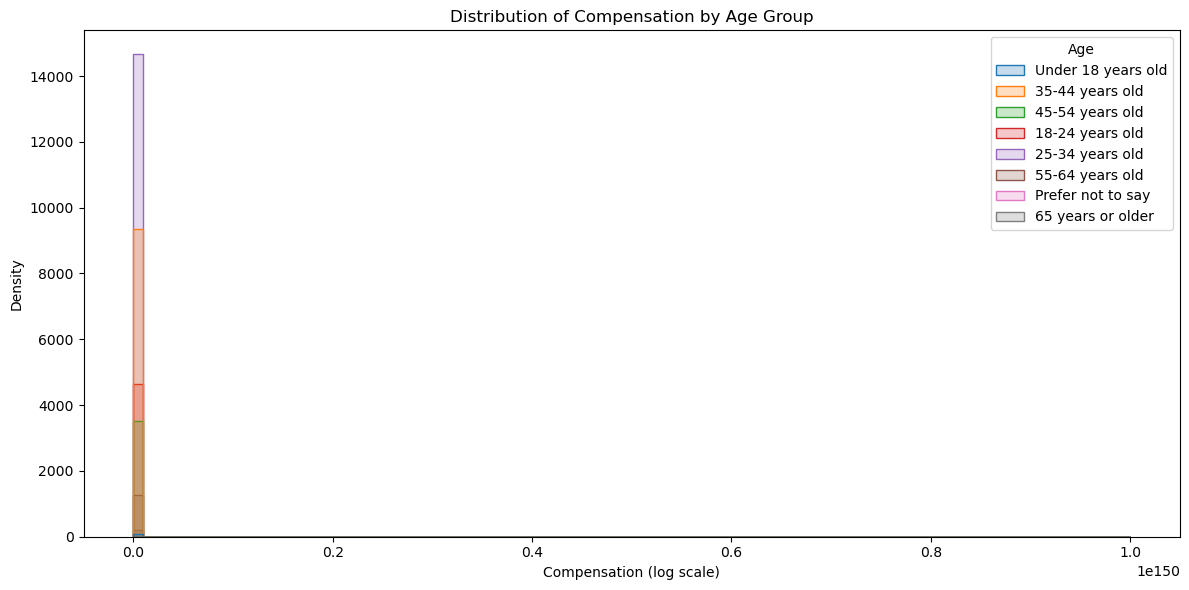

In [122]:
## Write your code here

# 1. Prepare age mapping if needed
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
}
df['AgeNumeric'] = df['Age'].map(age_map)

# 2. Plot histograms by age group
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='CompTotal', hue='Age', bins=100, element='step', common_norm=False)
# plt.xscale('log')  # Optional: for skewed data
plt.title("Distribution of Compensation by Age Group")
plt.xlabel("Compensation (log scale)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


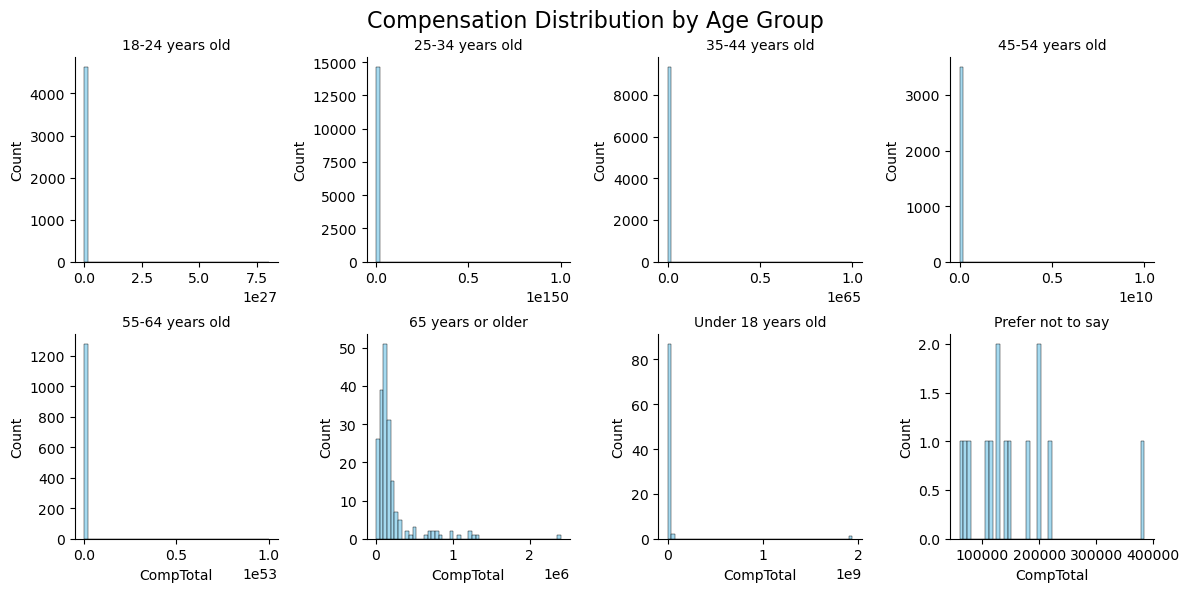

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure CompTotal is numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows with missing CompTotal or Age
df_clean = df.dropna(subset=['CompTotal', 'Age'])

# Set up FacetGrid: grid of histograms by Age group
g = sns.FacetGrid(df_clean, col="Age", col_wrap=4, sharex=False, sharey=False)

# Map histogram of numeric compensation
g.map(sns.histplot, "CompTotal", bins=50, color='skyblue')

# Set subplot titles
g.set_titles(col_template="{col_name}")

# Adjust spacing and add main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Compensation Distribution by Age Group", fontsize=16)

plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


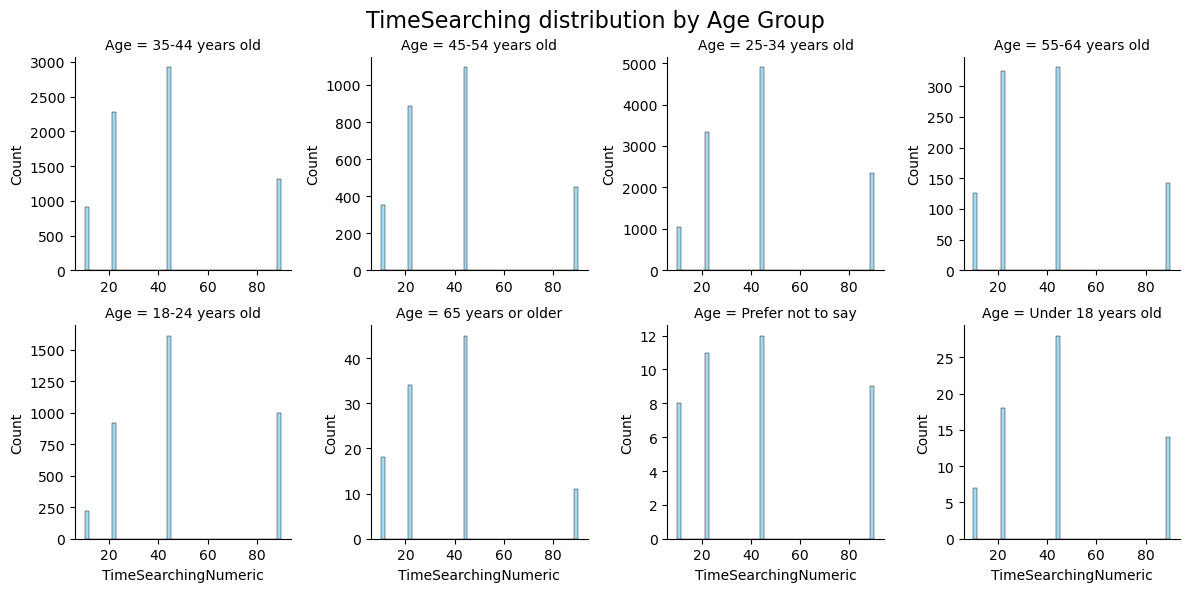

In [134]:
## Write your code here

# Map TimeSearching to minutes:
time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'More than 120 minutes a day': 150
}
df['TimeSearchingNumeric'] = df['TimeSearching'].map(time_map)

# Ensure TimeSearchingNumeric is numeric
df['TimeSearchingNumeric'] = pd.to_numeric(df['TimeSearchingNumeric'], errors='coerce')

# Drop rows with missing CompTotal or Age
df_clean = df.dropna(subset=['TimeSearchingNumeric', 'Age'])

# Set up FacetGrid: grid of histograms by Age group
g = sns.FacetGrid(df_clean, col="Age", col_wrap=4, sharex=False, sharey=False)

# Map histogram of numeric compensation
g.map(sns.histplot, "TimeSearchingNumeric", bins=50, color='skyblue')

# Set subplot titles
g.set_titles(col_template="{col_name}")

# Adjust spacing and add main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("TimeSearching distribution by Age Group", fontsize=16)

plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


"Since the data for 'DatabaseWantToWorkWith' is categorical, a bar chart is used instead of a histogram to accurately represent the frequency of each database choice.

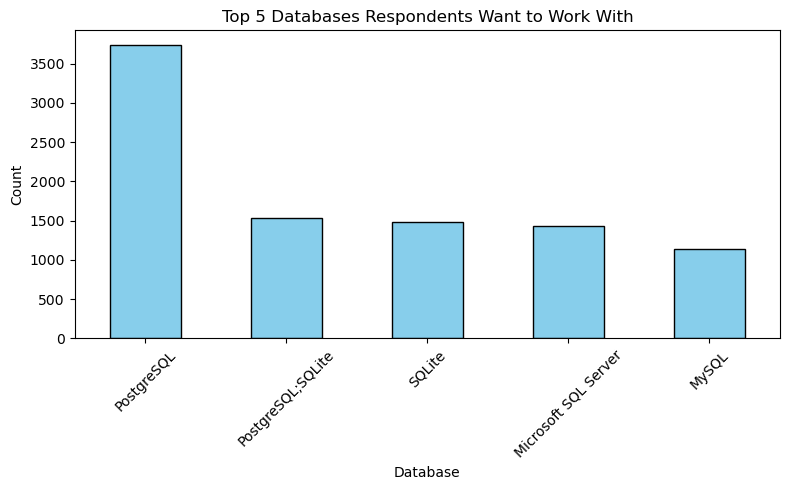

In [146]:
import matplotlib.pyplot as plt

top_5 = df['DatabaseWantToWorkWith'].value_counts().head(5)

plt.figure(figsize=(8, 5))
top_5.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 5 Databases Respondents Want to Work With')
plt.xlabel('Database')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [150]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

"Since the data for 'RemoteWork' is categorical, a bar chart is used instead of a histogram to accurately represent the frequency of each database choice.

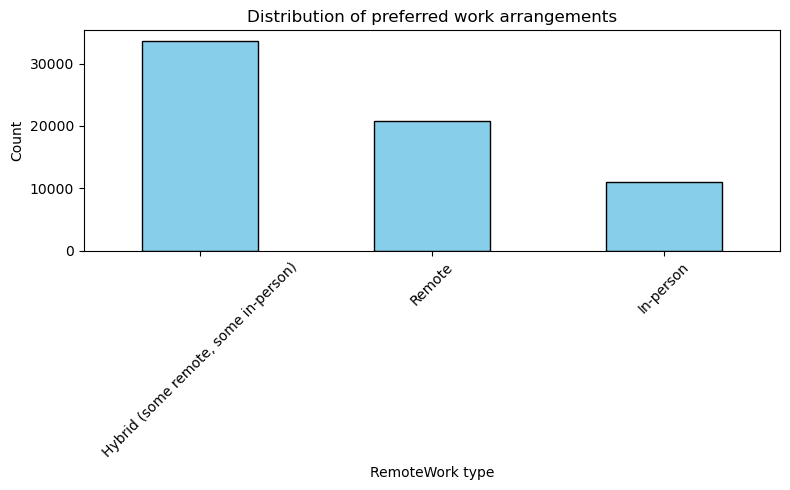

In [154]:
## Write your code here

import matplotlib.pyplot as plt

Df_RW = df['RemoteWork'].value_counts().head(5)

plt.figure(figsize=(8, 5))
Df_RW .plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of preferred work arrangements')
plt.xlabel('RemoteWork type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


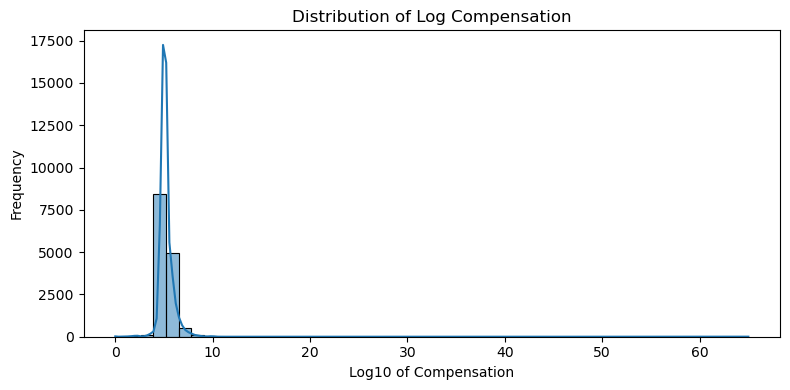

In [168]:
df['CompTotal_log'] = df['CompTotal'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

# Drop rows with missing values in key columns
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['AgeNumeric'] = df['Age'].map(age_map)

df_clean = df.dropna(subset=['CompTotal_log', 'AgeNumeric'])

# Filter for AgeNumeric values of interest
df_filtered = df_clean[df_clean['AgeNumeric'].isin([40, 50, 60])]


# Plot line graph
plt.figure(figsize=(8, 4))
sns.histplot(df_filtered['CompTotal_log'] , bins=50, kde=True)
plt.title("Distribution of Log Compensation")
plt.xlabel("Log10 of Compensation")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


C:\Users\serge\AppData\Local\Temp\ipykernel_8876\717878018.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')
C:\Users\serge\AppData\Local\Temp\ipykernel_8876\717878018.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
C:\Users\serge\AppData\Local\Temp\ipykernel_8876\717878018.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

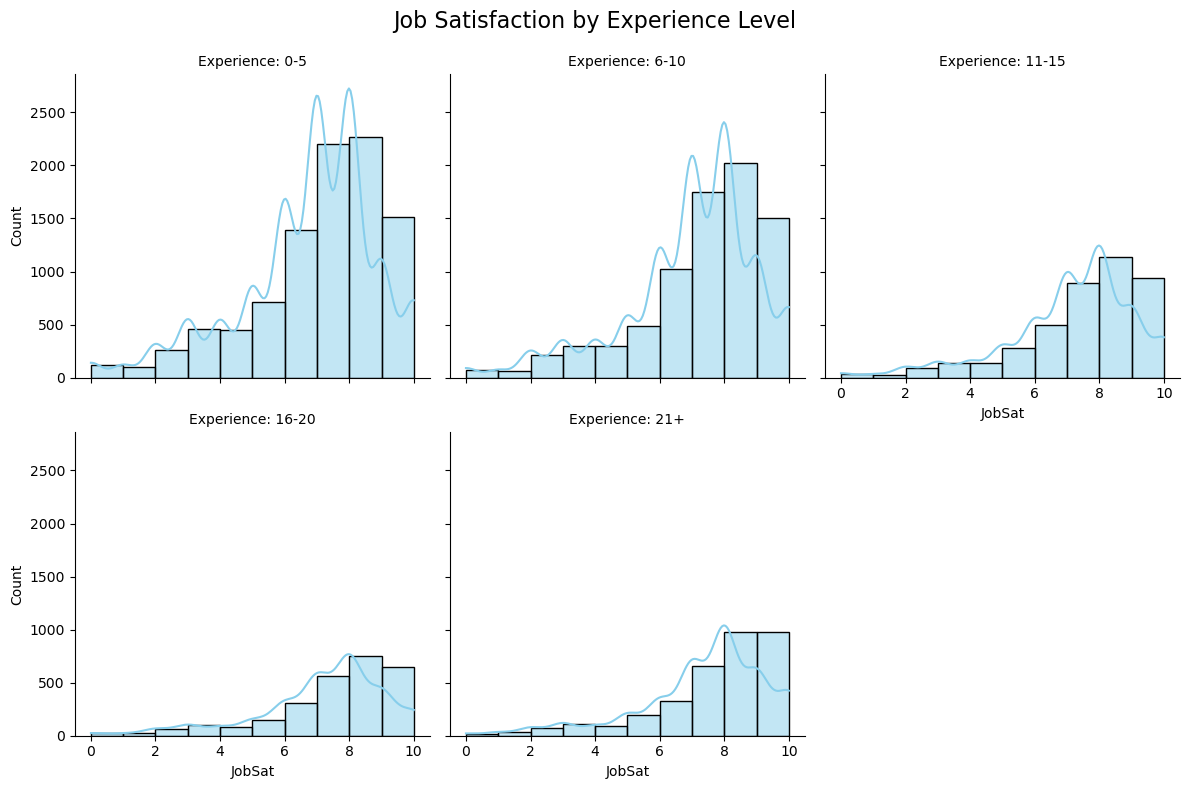

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Drop missing values
df_clean = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Ensure numeric type
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')

# Optional: Bin experience into ranges (like 0–5, 6–10, etc.)
df_clean['ExperienceBin'] = pd.cut(df_clean['YearsCodePro'], bins=[0, 5, 10, 15, 20, 50], labels=['0-5', '6-10', '11-15', '16-20', '21+'])

# Plot: Histogram of JobSat per ExperienceBin
g = sns.FacetGrid(df_clean, col='ExperienceBin', col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, 'JobSat', bins=10, color='skyblue', kde=True)

# Title and layout
g.set_titles(col_template="Experience: {col_name}")
g.fig.suptitle("Job Satisfaction by Experience Level", fontsize=16)
g.fig.subplots_adjust(top=0.9)
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [188]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
